Import Library


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler , MinMaxScaler , RobustScaler
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

Load Data

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

data=pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
data

Path to dataset files: /kaggle/input/breast-cancer-wisconsin-data


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
data.isnull().sum()


,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
data = data.drop(['id', 'Unnamed: 32' ], axis=1)

In [ ]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})


In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Outliers Detection

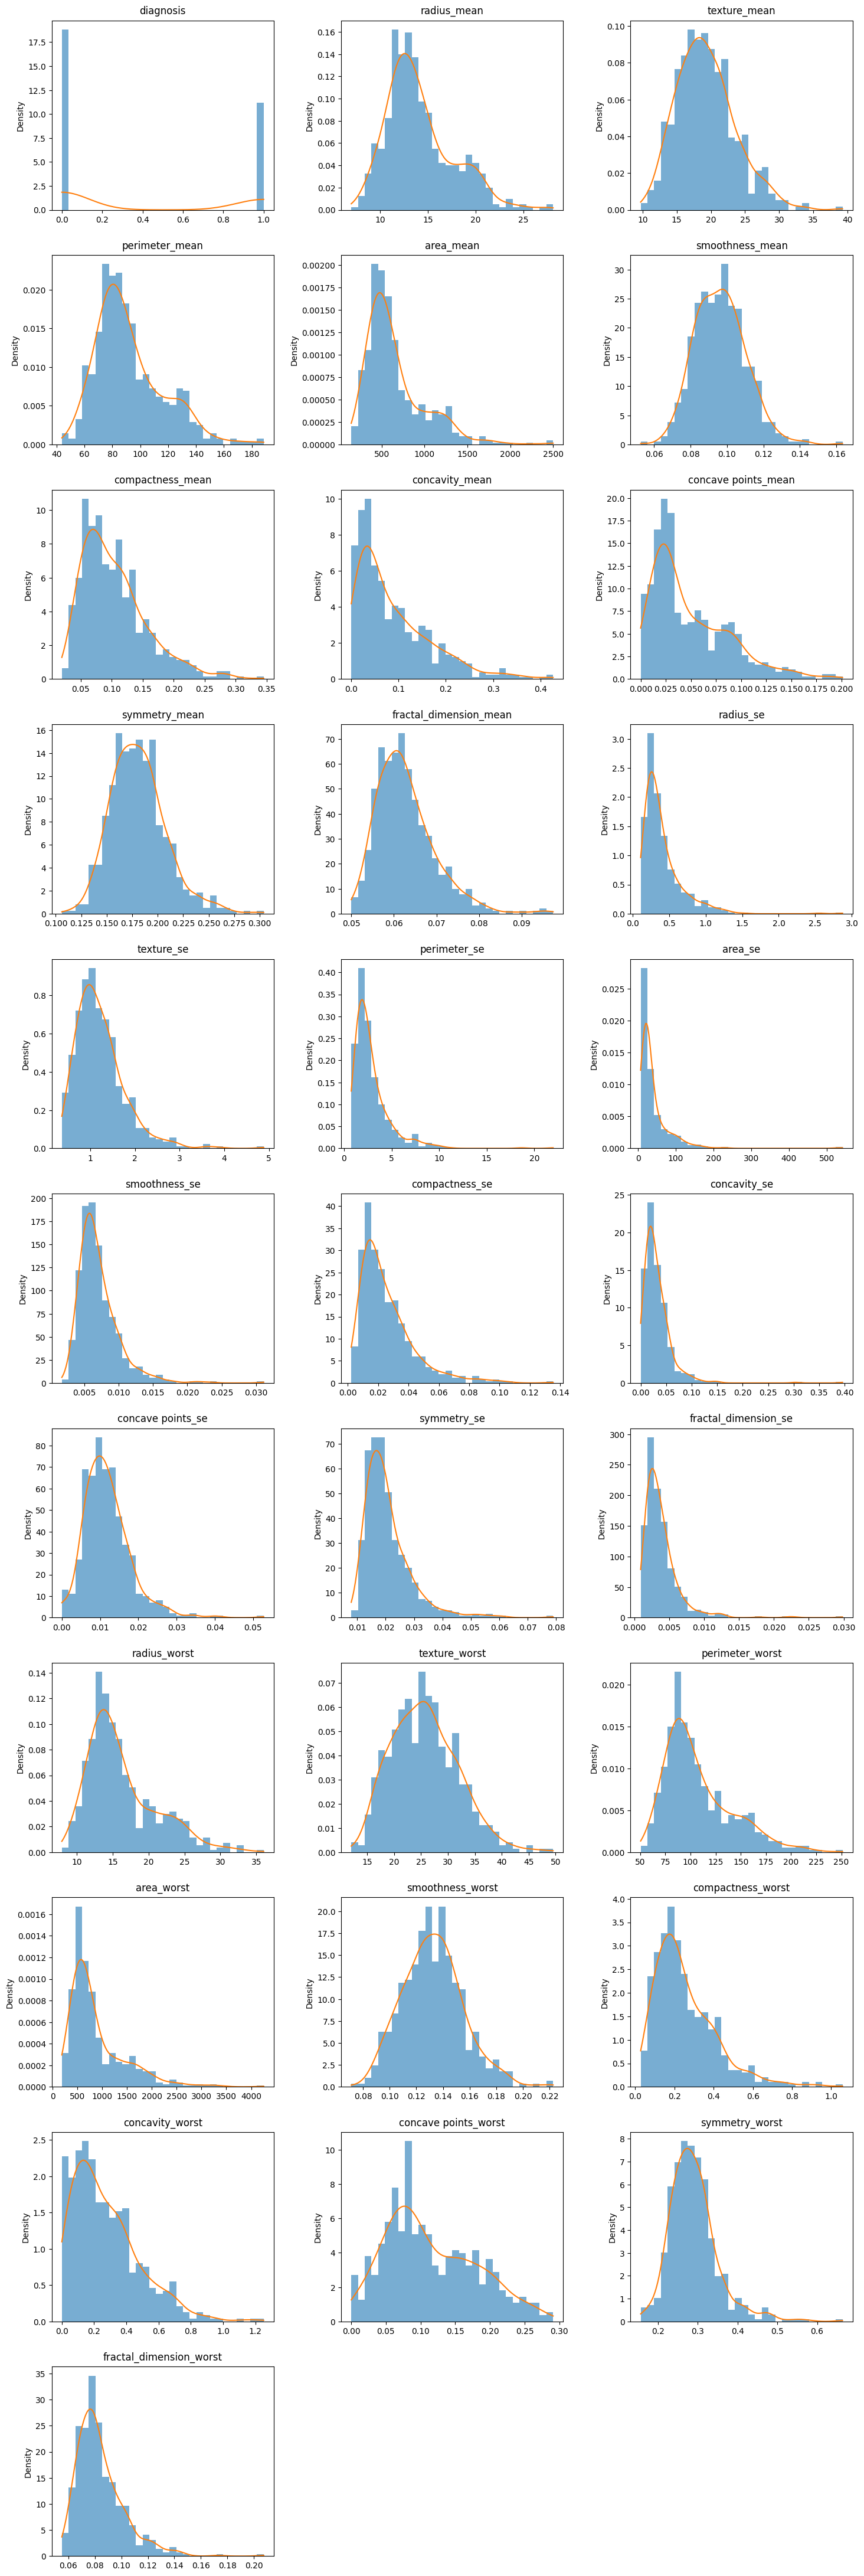

In [ ]:
cols = data.select_dtypes(include=[np.number]).columns.tolist()


n = len(cols)
n_cols = 3
n_rows = math.ceil(n / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    vals = data[col].dropna().values

    ax.hist(vals, bins=30, density=True, alpha=0.6)

    kde = gaussian_kde(vals)
    x_grid = np.linspace(vals.min(), vals.max(), 200)
    ax.plot(x_grid, kde(x_grid), lw=1.5)

    ax.set_title(f'{col}', pad=8)
    ax.set_xlabel('')
    ax.set_ylabel('Density')


for ax in axes[n:]:
    ax.axis('off')

plt.tight_layout(pad=2.0)
plt.show()


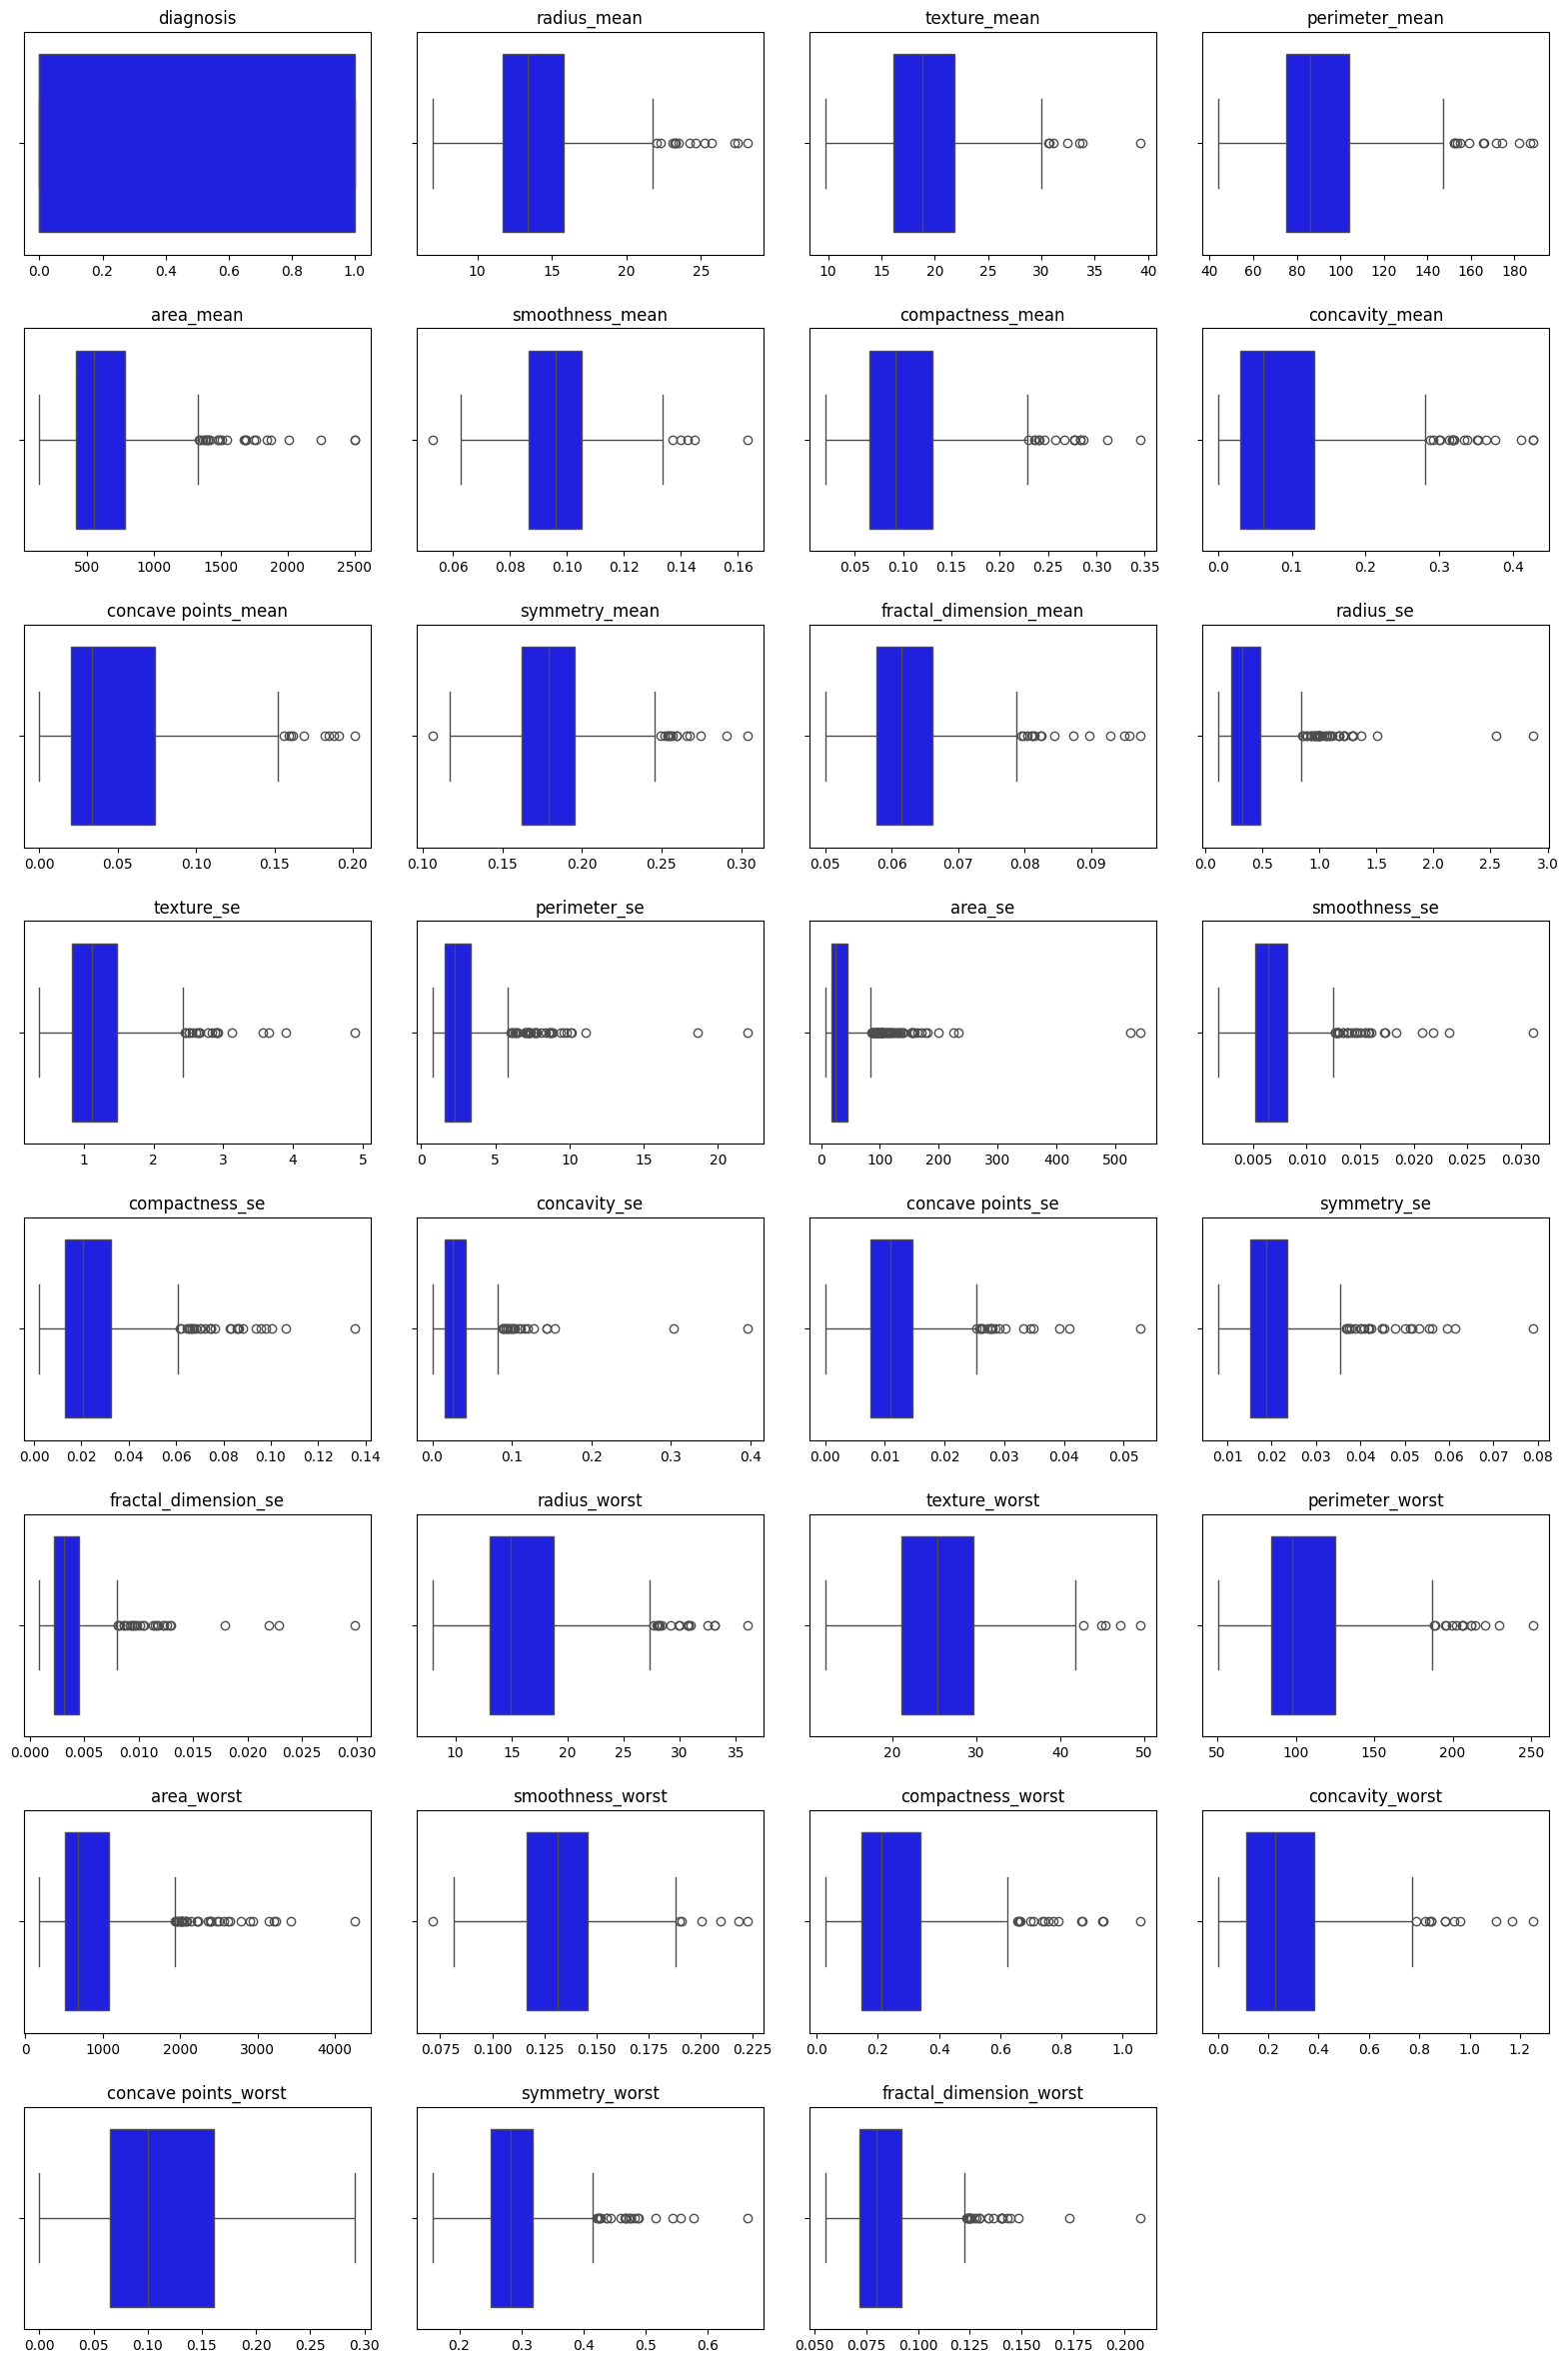

In [ ]:
cols = data.select_dtypes(include=[np.number]).columns.tolist()

n = len(cols)
n_cols = 4
n_rows = math.ceil(n / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    sns.boxplot(x=data[col], ax=ax, color='blue')
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('')


for ax in axes[n:]:
    ax.axis('off')

plt.tight_layout(pad=2.0)
plt.show()


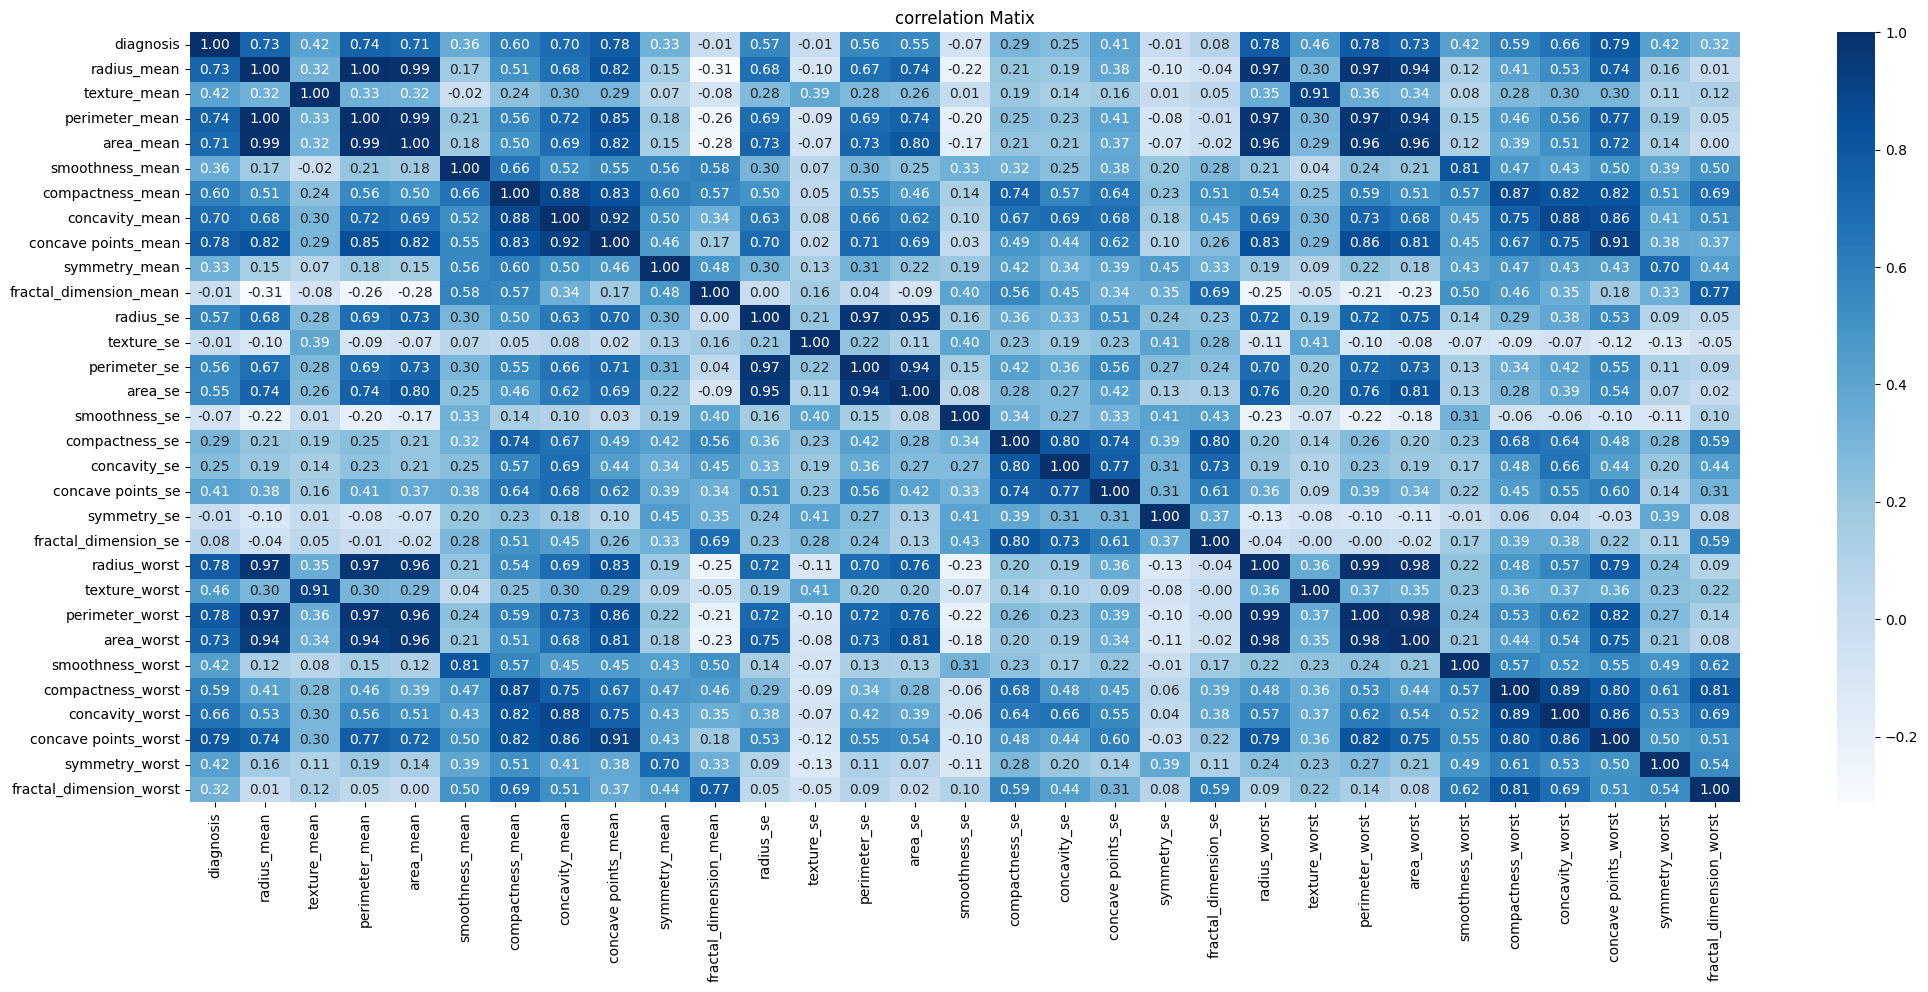

In [ ]:
plt.figure(figsize=(25, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True,cmap='Blues', fmt=".2f")
plt.title("correlation Matix")
plt.show()

In [ ]:
corr_values = correlation_matrix["diagnosis"].abs().drop("diagnosis")

high_corr = corr_values[corr_values > threshold].sort_values(ascending=False)

print(f"Selected features based on correlation with diagnosis (threshold = {threshold}):\n")
for feature, corr in high_corr.items():
    print(f"• {feature:<30} {corr:.3f}")

X_selected = data[high_corr.index.tolist()]
y = data["diagnosis"]


Selected features based on correlation with diagnosis (threshold = 0.4):

• concave points_worst           0.794
• perimeter_worst                0.783
• concave points_mean            0.777
• radius_worst                   0.776
• perimeter_mean                 0.743
• area_worst                     0.734
• radius_mean                    0.730
• area_mean                      0.709
• concavity_mean                 0.696
• concavity_worst                0.660
• compactness_mean               0.597
• compactness_worst              0.591
• radius_se                      0.567
• perimeter_se                   0.556
• area_se                        0.548
• texture_worst                  0.457
• smoothness_worst               0.421
• symmetry_worst                 0.416
• texture_mean                   0.415
• concave points_se              0.408


Scalling Fitur

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data)

Modeling

In [ ]:
X_selected=data.drop(columns=['diagnosis'])
y=data['diagnosis']

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X_selected,y, test_size=0.3, shuffle = True, random_state=42)

Logistic Regression

In [ ]:
lo_model = LogisticRegression()
lo_model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
Y_pred_lo=lo_model.predict(X_test)
print(accuracy_score(Y_pred_lo, Y_test))

0.9707602339181286


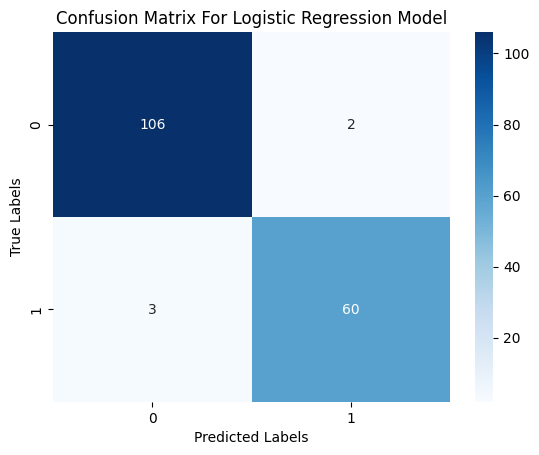

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       109
           1       0.95      0.97      0.96        62

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
cm_lo = confusion_matrix(Y_test, Y_pred_lo)
sns.heatmap(cm_lo, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Logistic Regression Model')
plt.show()


print(classification_report(Y_pred_lo, Y_test))

SVM

In [ ]:
svc_model=SVC()
svc_model.fit(X_train,Y_train)

SVC()

In [ ]:
Y_pred_svc=svc_model.predict(X_test)
print(accuracy_score(Y_pred_svc, Y_test))

0.935672514619883


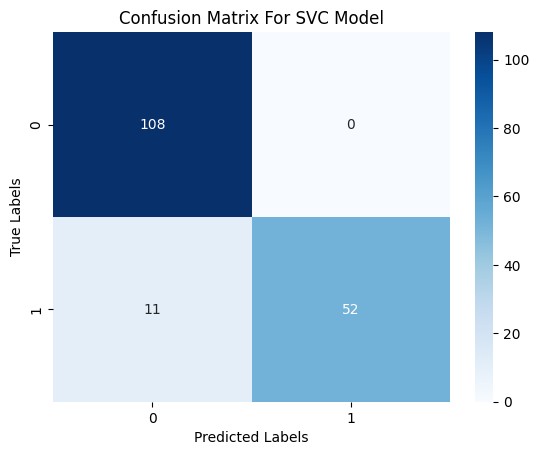

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       119
           1       0.83      1.00      0.90        52

    accuracy                           0.94       171
   macro avg       0.91      0.95      0.93       171
weighted avg       0.95      0.94      0.94       171



In [ ]:
cm_svc = confusion_matrix(Y_test, Y_pred_svc)
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For SVC Model')
plt.show()

print(classification_report(Y_pred_svc, Y_test))

Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
Y_pred_dt = dt_model.predict(X_test)
print(accuracy_score(Y_pred_dt, Y_test))

0.9532163742690059


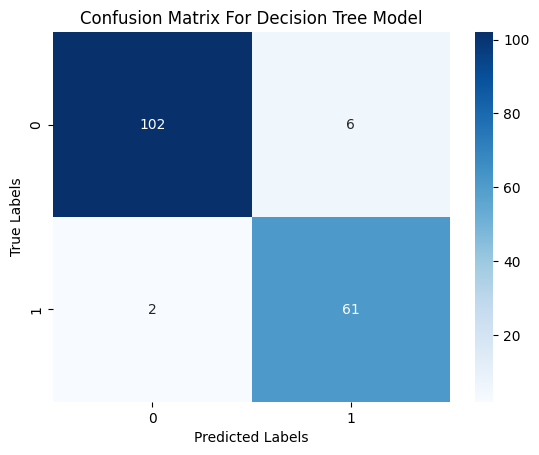

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       104
           1       0.97      0.91      0.94        67

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
cm_dt = confusion_matrix(Y_test, Y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Decision Tree Model')
plt.show()

print(classification_report(Y_pred_dt, Y_test))

Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
Y_pred_rf = rf_model.predict(X_test)
print(accuracy_score(Y_pred_rf, Y_test))

0.9707602339181286


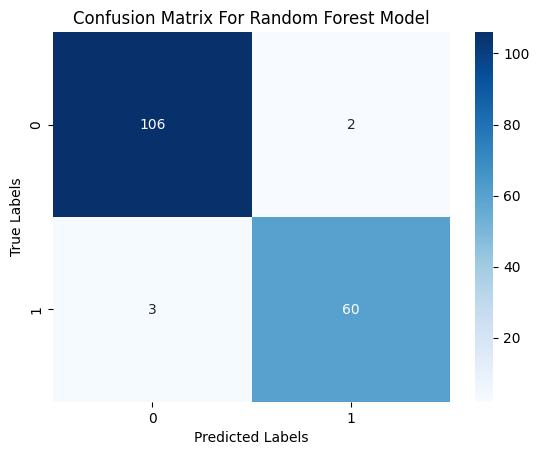

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       109
           1       0.95      0.97      0.96        62

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
cm_rf = confusion_matrix(Y_test, Y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Random Forest Model')
plt.show()

print(classification_report(Y_pred_rf, Y_test))

XGB

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
Y_pred_xgb = xgb_model.predict(X_test)
print(accuracy_score(Y_pred_xgb, Y_test))

0.9649122807017544


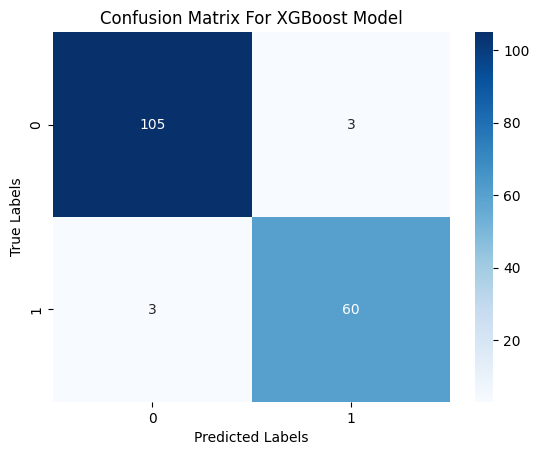

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       109
           1       0.95      0.97      0.96        62

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
cm_xgb = confusion_matrix(Y_test, Y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For XGBoost Model')
plt.show()

print(classification_report(Y_pred_rf, Y_test))

Naive Bayes


In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

GaussianNB()

In [ ]:
Y_pred_nb = nb_model.predict(X_test)
print(accuracy_score(Y_pred_nb, Y_test))

0.9473684210526315


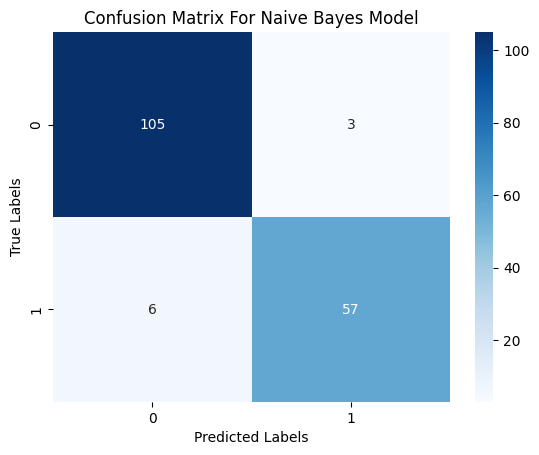

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       111
           1       0.90      0.95      0.93        60

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
cm_nb = confusion_matrix(Y_test, Y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Naive Bayes Model')
plt.show()

print(classification_report(Y_pred_nb, Y_test))